In [1]:
import numpy as np

import pickle

import sys
sys.path.append("../")

from src.visualization import plot_waveforms

# plot_waveforms

In [4]:
with open("../data/visualization/phenotype_model.pickle", 'rb') as f:
    phenotype_model = pickle.load(f)
    
with open("../data/visualization/phenotype_control.pickle", 'rb') as f:
    phenotype_control = pickle.load(f)

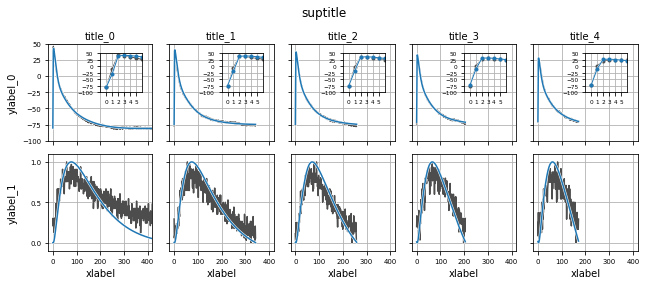

In [5]:
plot_waveforms(phenotype_model, phenotype_control,
               xlim=[-20, 420], xticks=np.arange(0, 420, 100),
               yticks_list=[np.arange(-100, 56, 25), None],
               ylim_list=[[-100, 50], [-0.1, 1.1]],
               titles=[f'title_{i}' for i in range(len(phenotype_control))],
               ylabels=[f'ylabel_{i}' for i in range(len(phenotype_control[0]))],
               xlabel='xlabel', suptitle='suptitle',
               inset_row_indices=[0], xlim_inset=[-1, 6], xticks_inset=np.arange(0, 6));